In [5]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

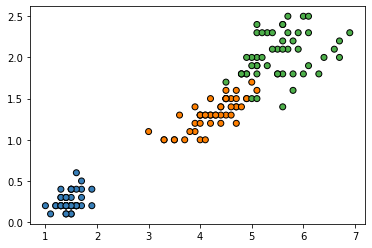

In [4]:
colors = np.array(list(['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', 
                        '#984ea3', '#999999', '#e41a1c', '#dede00', "#000000"]))

iris = load_iris()
X, y = iris.data, iris.target
X = X[:, [2, 3]]

plt.scatter(X[:, 0], X[:, 1], color=colors[y], edgecolors='k')

In [6]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

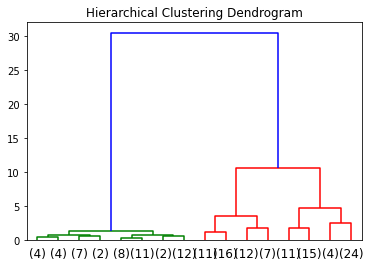

In [7]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold = 0.0001, n_clusters = None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

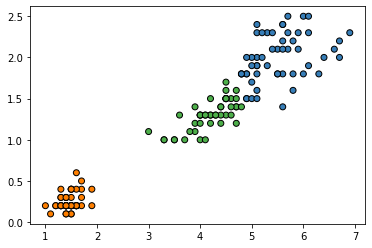

In [8]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(X)
y_pred = model.labels_.astype(np.int)
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred], edgecolors='k')
plt.show()